In [3]:
import json
import geog
import shapely.geometry
import descartes 
import geopandas as gpd
from shapely.geometry import Point, Polygon

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#data imports

#importing the map.
#downloaded from https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html

usa = gpd.read_file('./maps/states_21basic/states.shp')

In [5]:
usa.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...


In [6]:
usa.tail(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
49,Michigan,50,26,East North Central,MI,(POLYGON ((-88.49752727880752 48.1737953723300...
50,Alaska,51,02,Pacific,AK,(POLYGON ((-161.3337853466416 58.7332483821643...


In [7]:
#A mapping dictionary, with each state and it's index.

def state_plotter(states, us_map=True, long_lat=False, dia=False):
    
    #Simple function to plot multiple states on one map.
    #us_map = True/False will toggle whether a map of the whole US is in the background or not.
    #if else statements added so the map can exclude Alaska and Hawaii when not selected.
    #This function can be tuned down the line to take arguments at the clients request 
        #(i.e. 'Eastern Seaboard', 'Northwest')
        
    #if you want to plot a circle on the map, set long_lat and dia (diameter)
    
    fig, ax = plt.subplots(figsize=(30,30))
    #can adapt to use x_lim and y_lim
    
    if us_map:
        
        if 'HI' in states:

            usa[0:50].plot(ax=ax, alpha = 0.3)

        elif 'AK' in states:

            usa[1:51].plot(ax=ax, alpha = 0.3)

        elif 'AK' and 'HI' in states:

            usa[0:51].plot(ax=ax, alpha = 0.3)

        else:

            usa[1:50].plot(ax=ax, alpha = 0.3)

        for n in states:
            usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor='y', linewidth =2)  
            
    elif us_map == False:
        for n in states:
            usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor='y', linewidth =2) 
            
    if long_lat and dia:
        n_points = 2000
        p = shapely.geometry.Point(long_lat)
        angles = np.linspace(0, 360, n_points)
        d = dia
        polygon = geog.propagate(p, angles, d)
        df_test = pd.DataFrame(polygon)
        #print(shapely.geometry.mapping(shapely.geometry.Polygon(polygon)))

        df_test.plot(ax=ax, x = 0, y = 1, kind = 'scatter', color = 'limegreen')

running some tests

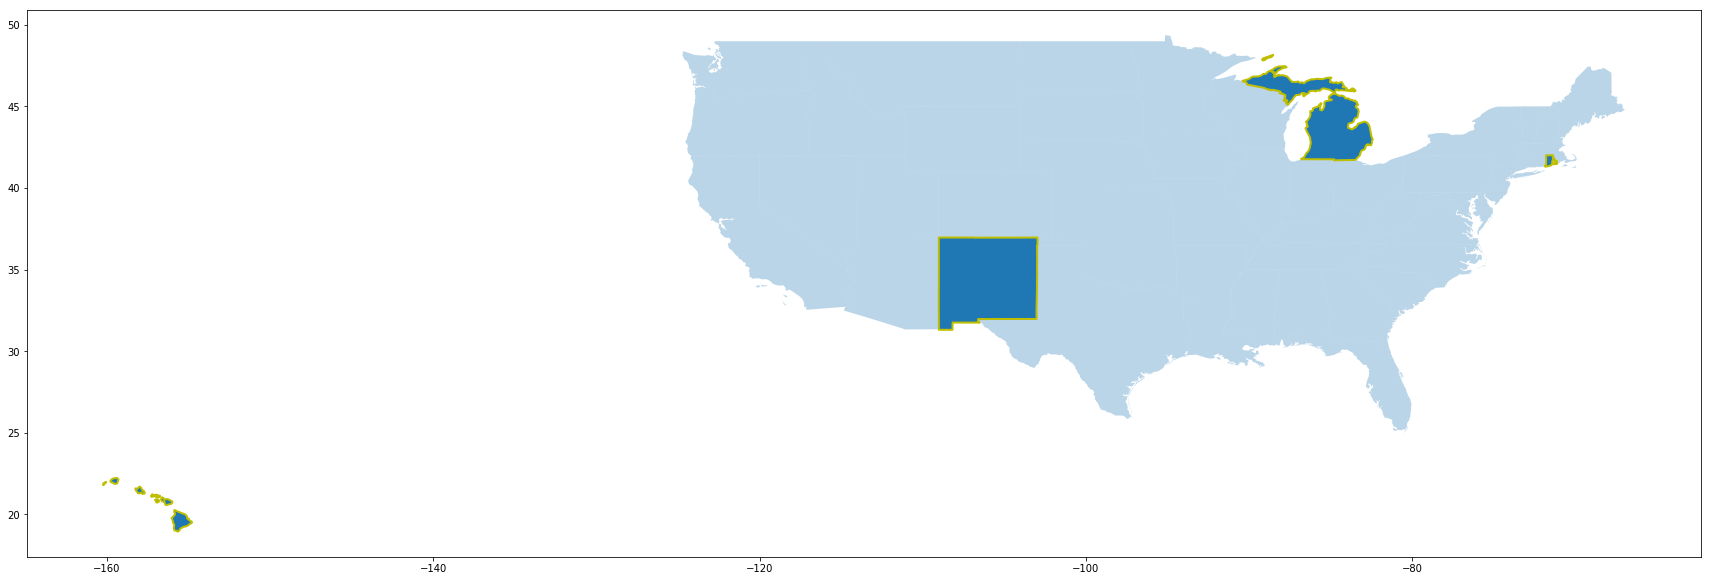

In [8]:
state_plotter(['RI', 'NM', 'MI', 'HI'])

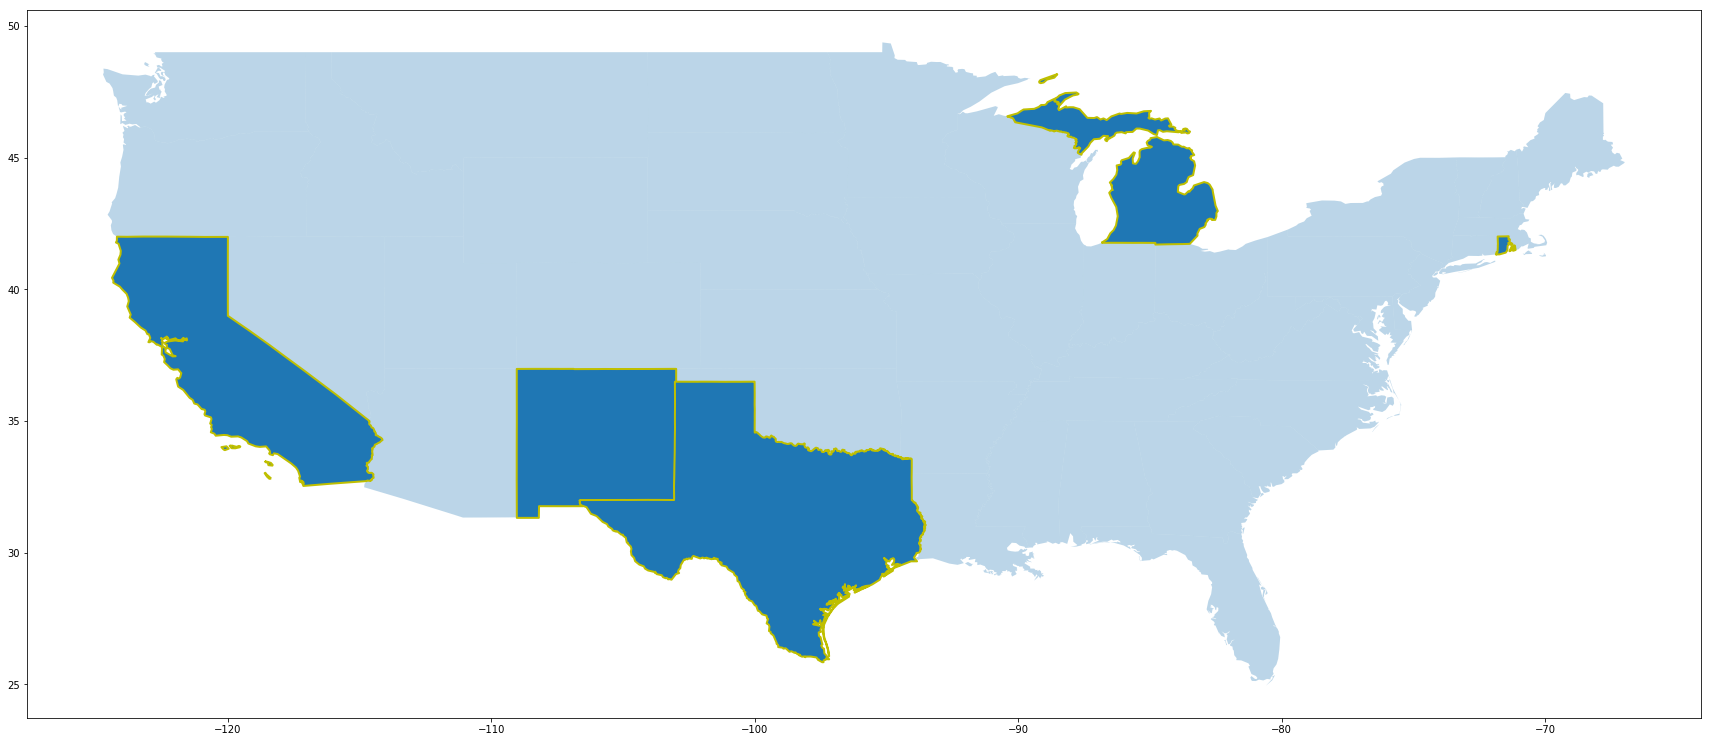

In [9]:
state_plotter(['RI', 'NM', 'MI', 'CA', 'TX'])

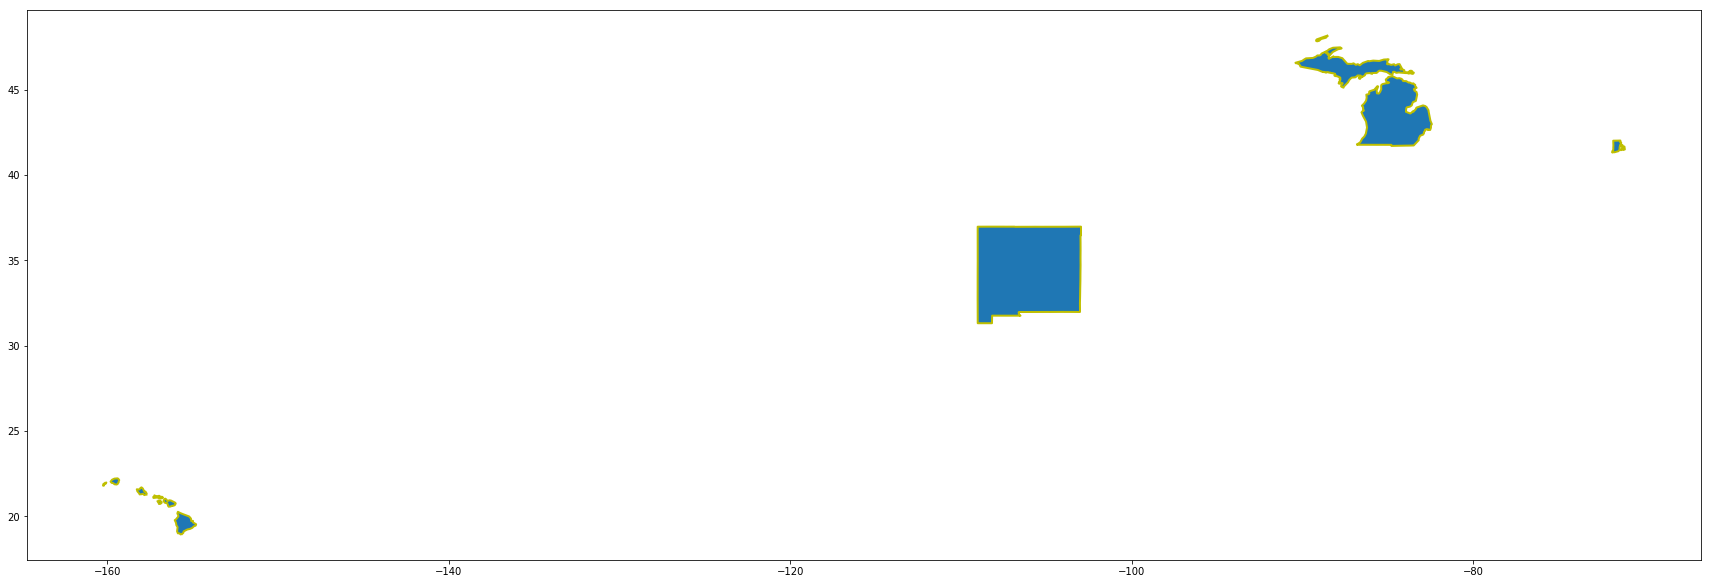

In [10]:
#in a case where the states are spread out, it's best to set us_map to True.
#see how odd it looks without the us_map?
state_plotter(['RI', 'NM', 'MI', 'HI'], us_map=False)

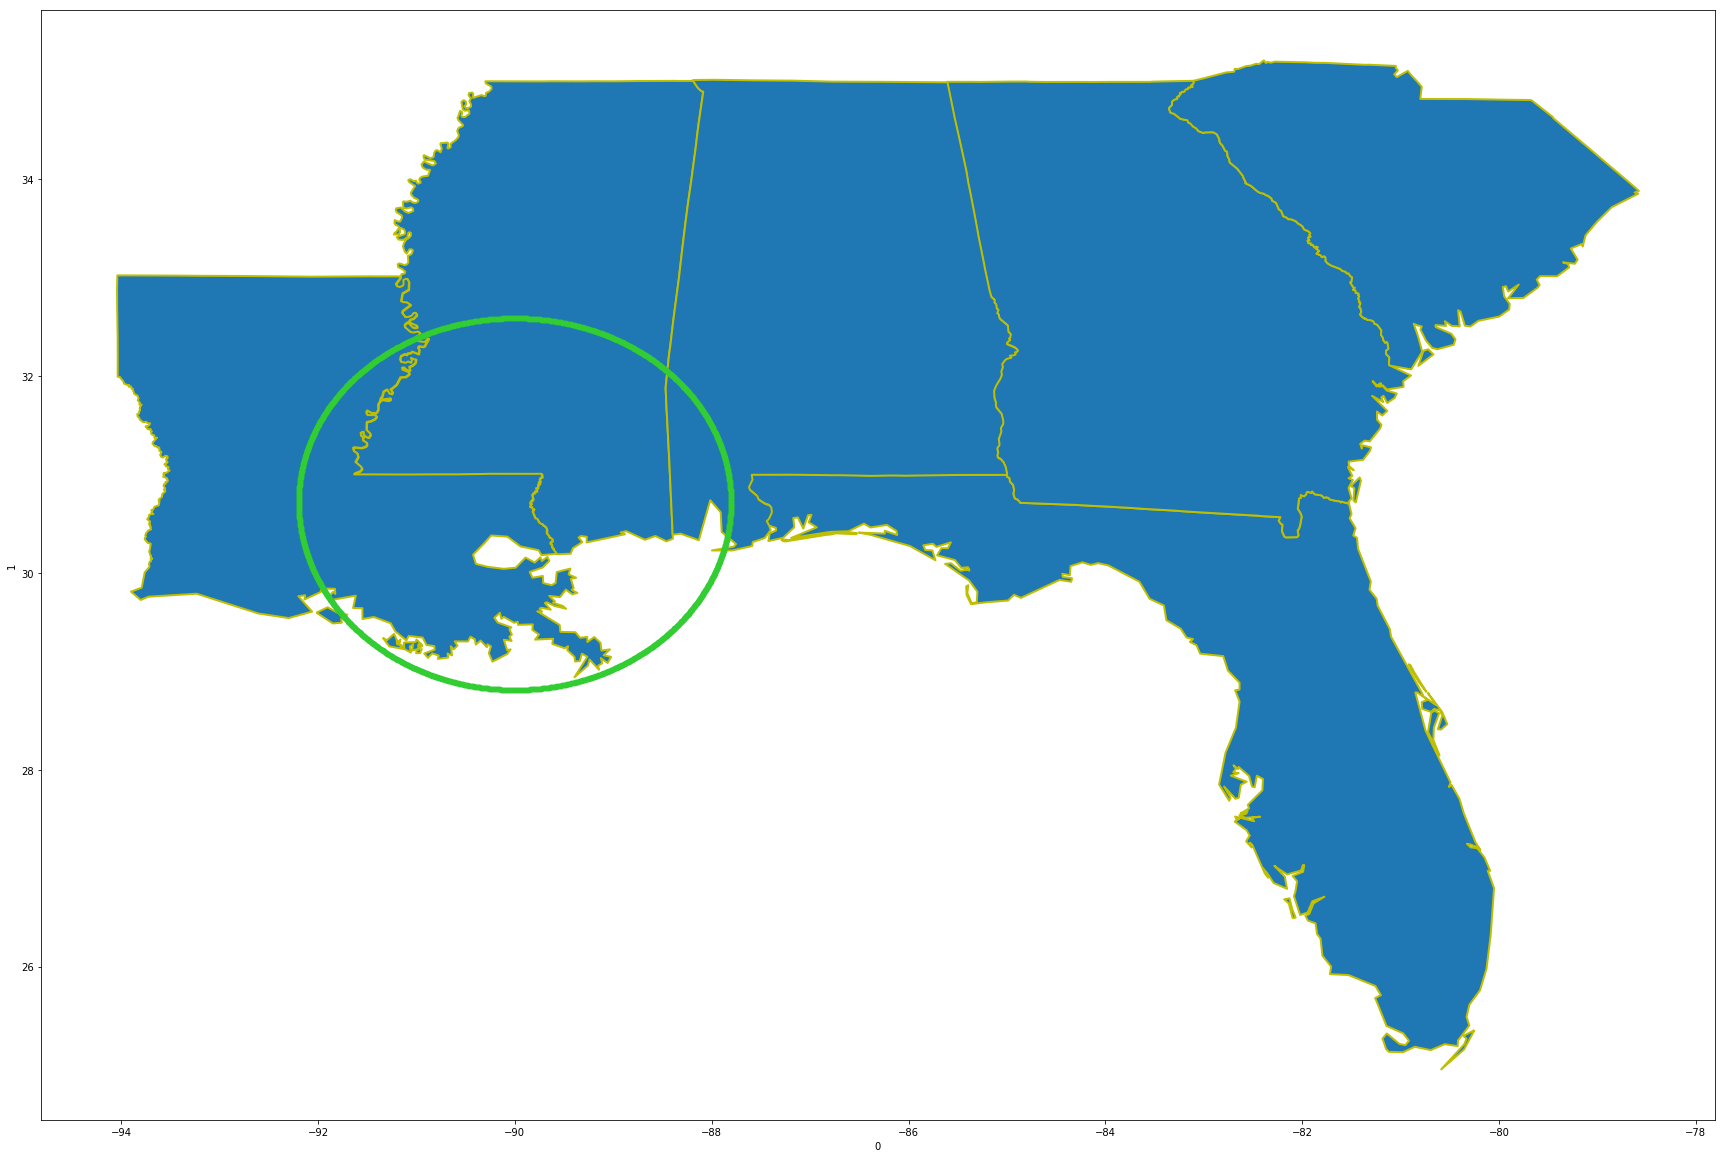

In [11]:
#when states are grouped together, you can zoom in to the selected states by setting us_map = False
state_plotter(['FL', 'GA', 'MS', 'AL', 'LA', 'SC'], us_map=False, long_lat = [-90.0,30.7], dia = 210000)

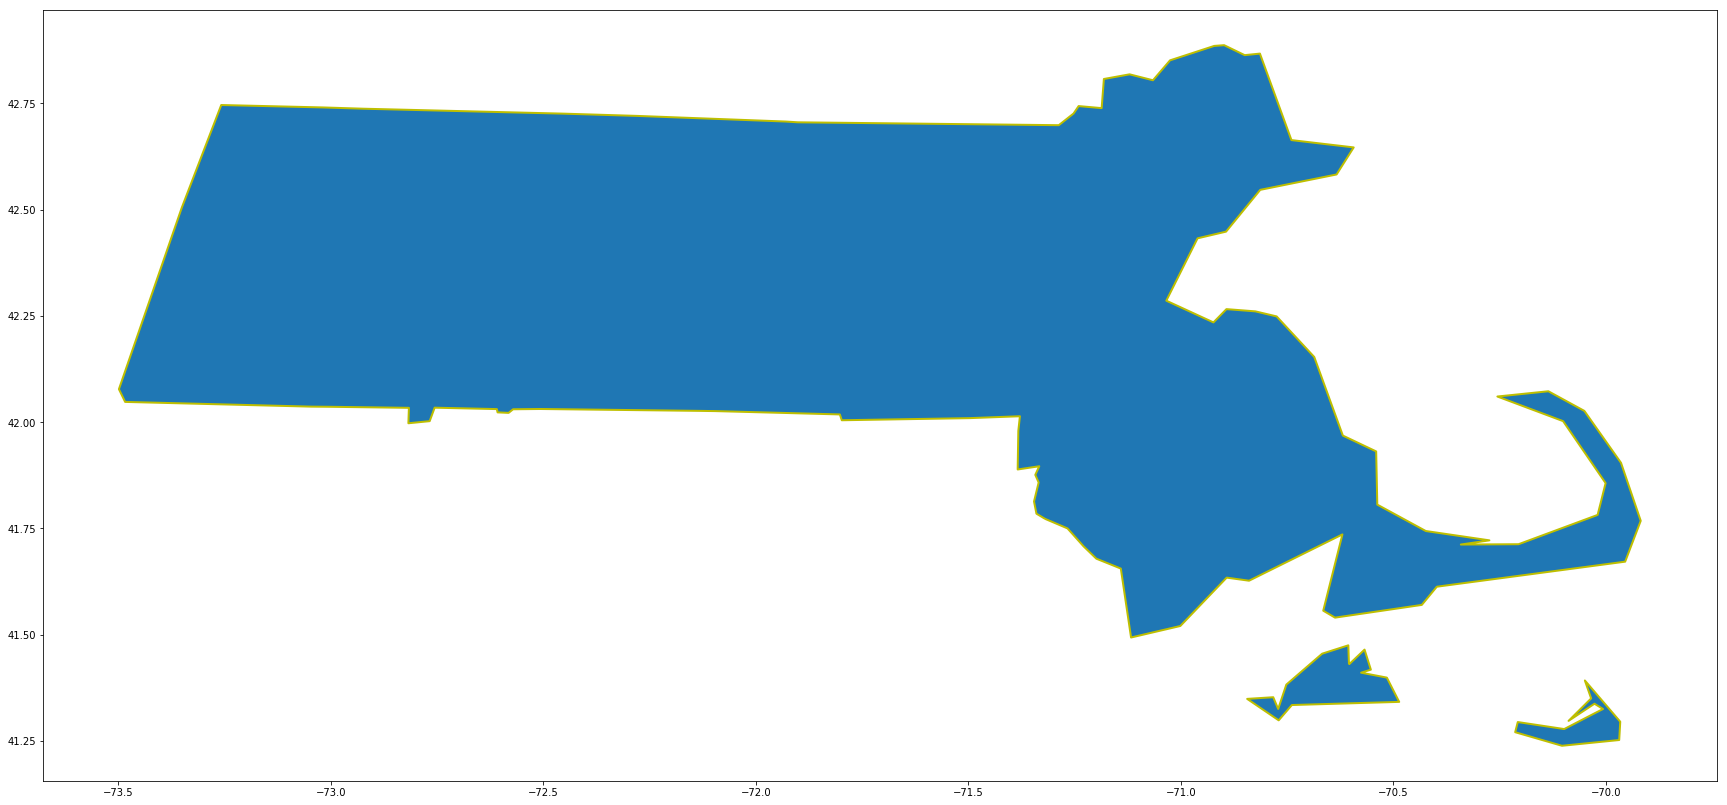

In [12]:
state_plotter(['MA'], us_map=False)

------------------

### Adding Zips

----

In [13]:
#import zip file
#downloaded from https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html

#notice that this file is a .shp, or shapefile.  We load a shapefile using the command below.
#What we create when loading a shapefile is a GeoDataFrame
#in order for a .shp file to run properly, it needs to be contained in the same folder 
#as the other fileother file types in the same folder, 

zips = gpd.read_file('./cb_2017_us_zcta510_500k/cb_2017_us_zcta510_500k.shp')

In [14]:
#.info will show us:
#how many rows we have
#if there are any null values
#the dtypes of each column

zips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 6 columns):
ZCTA5CE10     33144 non-null object
AFFGEOID10    33144 non-null object
GEOID10       33144 non-null object
ALAND10       33144 non-null int64
AWATER10      33144 non-null int64
geometry      33144 non-null object
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


In [15]:

zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35442,8600000US35442,35442,610213891,10838694,"(POLYGON ((-88.252618 32.92675, -88.249724 32...."
1,85365,8600000US85365,85365,3545016067,9766486,"(POLYGON ((-114.684663 32.687389, -114.676063 ..."
2,71973,8600000US71973,71973,204670474,1264709,"POLYGON ((-94.46643176650841 34.330735, -94.46..."
3,95445,8600000US95445,95445,221559097,7363179,"POLYGON ((-123.643051 38.851233, -123.641401 3..."
4,06870,8600000US06870,06870,5945321,3841130,"POLYGON ((-73.58765810889219 41.0076522198727,..."


In [16]:
zips.columns

Index(['ZCTA5CE10', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10',
       'geometry'],
      dtype='object')

In [17]:
zips.columns = ['zipcode', 'AFFGEOID10', 'GEOID10', 'ALAND10', 'AWATER10',
       'geometry']

In [18]:
zips.sort_values(by='zipcode')[142:250].head()

,zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
30787,01001,8600000US01001,01001,29797204,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
15044,01002,8600000US01002,01002,142617852,4276645,"POLYGON ((-72.54419899999999 42.42715, -72.540..."
3243,01003,8600000US01003,01003,1842387,12788,"POLYGON ((-72.532791 42.390298, -72.5322599999..."
7660,01005,8600000US01005,01005,114637907,666424,"POLYGON ((-72.20515 42.417679, -72.10094099999..."
25131,01007,8600000US01007,01007,136236049,6944239,"POLYGON ((-72.47228699999999 42.351458, -72.40..."


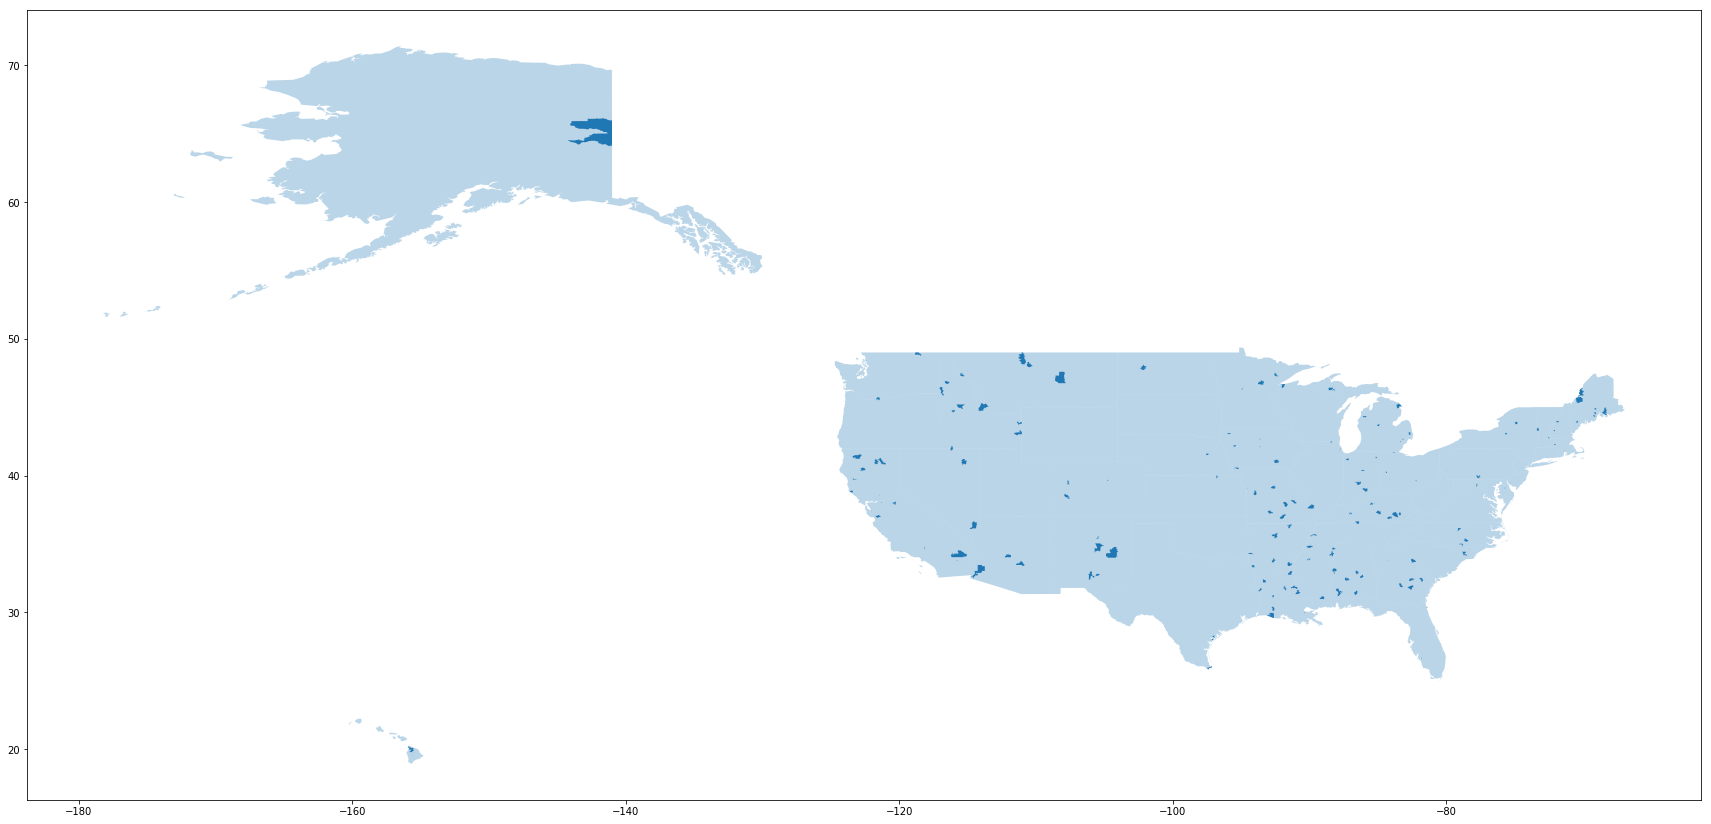

In [19]:
fig, ax = plt.subplots(figsize=(30,30))
usa[0:51].plot(ax=ax, alpha = 0.3)
zips[0:200].plot(ax=ax)

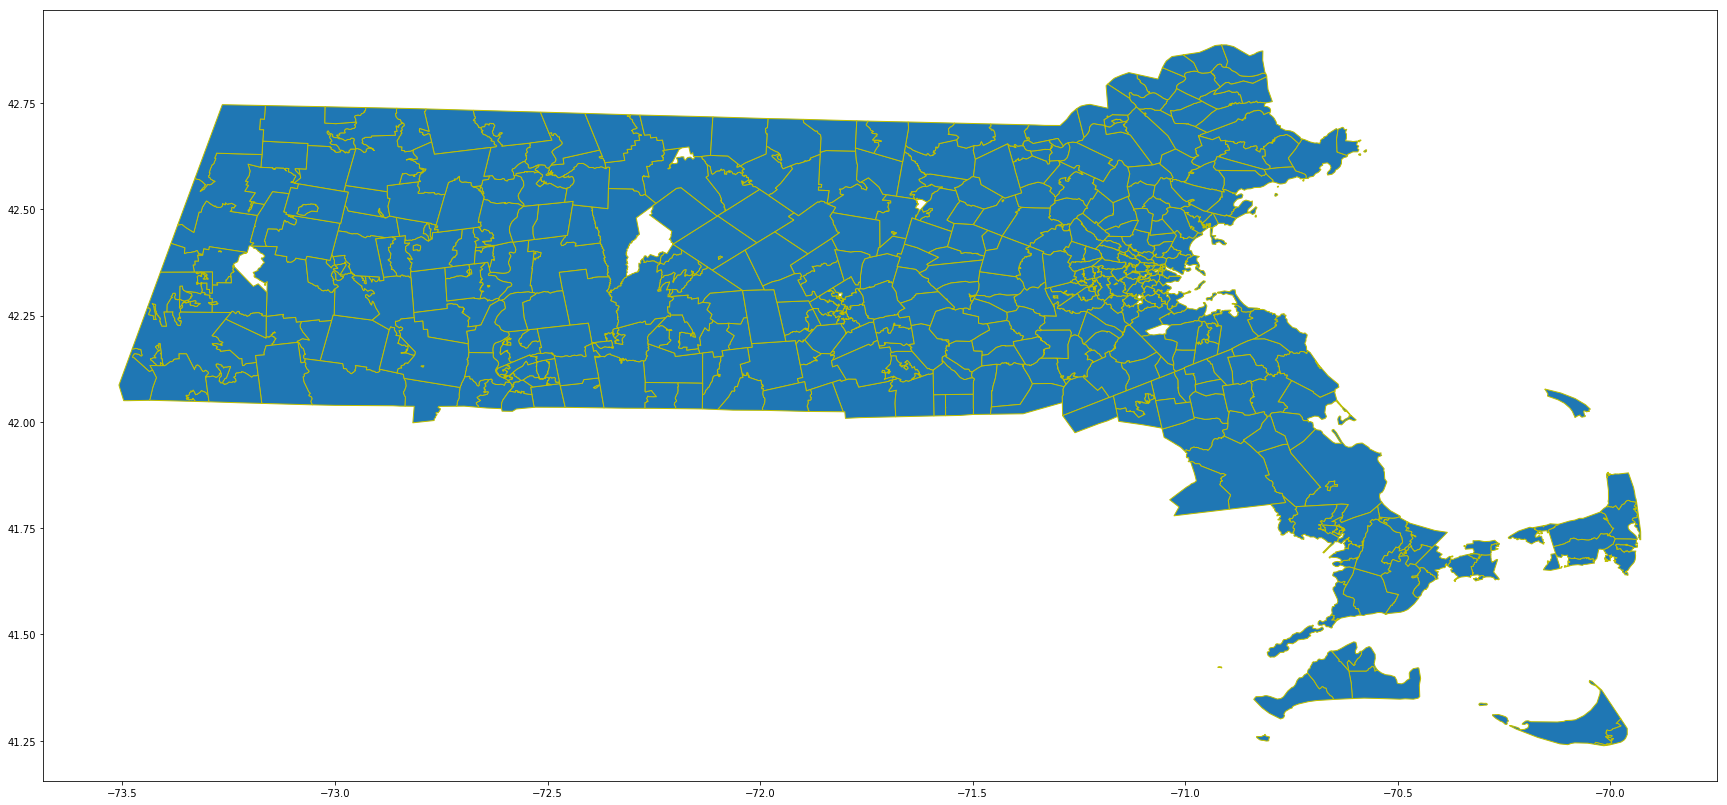

In [20]:
fig, ax = plt.subplots(figsize=(30,30))
zips.sort_values(by='zipcode')[142:628].plot(ax=ax, edgecolor='y')


------------------

_____

In [21]:
#The zipcode file we use for our geometry doesn't have states.  We want to add states, so will map and 
#add a column to our GeoDataFrame using this csv. 
zip_state_no_coordinates = pd.read_csv('./free-zipcode-database.csv')

/Users/erikgreenj/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
zip_state_no_coordinates.head(2)

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN


In [23]:
zip_state_no_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81831 entries, 0 to 81830
Data columns (total 20 columns):
RecordNumber           81831 non-null int64
Zipcode                81831 non-null int64
ZipCodeType            81831 non-null object
City                   81831 non-null object
State                  81831 non-null object
LocationType           81831 non-null object
Lat                    81178 non-null float64
Long                   81178 non-null float64
Xaxis                  81831 non-null float64
Yaxis                  81831 non-null float64
Zaxis                  81831 non-null float64
WorldRegion            334 non-null object
Country                81831 non-null object
LocationText           81180 non-null object
Location               81830 non-null object
Decommisioned          81831 non-null bool
TaxReturnsFiled        58447 non-null float64
EstimatedPopulation    58447 non-null float64
TotalWages             58354 non-null float64
Notes                  1844 non-nu

In [24]:
zip_state_no_coordinates['Zipcode'] = zip_state_no_coordinates['Zipcode'].map(lambda x: str(x))

In [25]:
zip_state_no_coordinates['Zipcode'] = zip_state_no_coordinates['Zipcode'].map(lambda x: x.zfill(5))

In [26]:
zip_state_no_coordinates.head(2)

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,1,00704,STANDARD,PARC PARQUE,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Parc Parque, PR",NA-US-PR-PARC PARQUE,False,NaN,NaN,NaN,NaN
1,2,00704,STANDARD,PASEO COSTA DEL SUR,PR,NOT ACCEPTABLE,17.96,-66.22,0.38,-0.87,0.3,NaN,US,"Paseo Costa Del Sur, PR",NA-US-PR-PASEO COSTA DEL SUR,False,NaN,NaN,NaN,NaN


In [27]:
#this isn't entirely necessary, just makes it easier to append a column to our other df
zip_dict = dict(zip(zip_state_no_coordinates.Zipcode, zip_state_no_coordinates.State))

In [28]:
zips.head()

,zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35442,8600000US35442,35442,610213891,10838694,"(POLYGON ((-88.252618 32.92675, -88.249724 32...."
1,85365,8600000US85365,85365,3545016067,9766486,"(POLYGON ((-114.684663 32.687389, -114.676063 ..."
2,71973,8600000US71973,71973,204670474,1264709,"POLYGON ((-94.46643176650841 34.330735, -94.46..."
3,95445,8600000US95445,95445,221559097,7363179,"POLYGON ((-123.643051 38.851233, -123.641401 3..."
4,06870,8600000US06870,06870,5945321,3841130,"POLYGON ((-73.58765810889219 41.0076522198727,..."


In [29]:
zips['state'] = zips['zipcode'].map(lambda x: zip_dict[x])

In [30]:
zips.head()

,zipcode,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,state
0,35442,8600000US35442,35442,610213891,10838694,"(POLYGON ((-88.252618 32.92675, -88.249724 32....",AL
1,85365,8600000US85365,85365,3545016067,9766486,"(POLYGON ((-114.684663 32.687389, -114.676063 ...",AZ
2,71973,8600000US71973,71973,204670474,1264709,"POLYGON ((-94.46643176650841 34.330735, -94.46...",AR
3,95445,8600000US95445,95445,221559097,7363179,"POLYGON ((-123.643051 38.851233, -123.641401 3...",CA
4,06870,8600000US06870,06870,5945321,3841130,"POLYGON ((-73.58765810889219 41.0076522198727,...",CT


In [31]:
#zips[zips.state == 'MA'].index[:47]

------

__________

In [32]:
#Function to plot multiple states/zipcodes on one map. 
#function is dependent on the usa and zipcode data files in this notebook
#also, imports are required, files must be saved/formatted properly.

#A mapping dictionary, with each state and it's index.
state_dict = dict(zip(usa.STATE_ABBR, usa.DRAWSEQ))
zip_dict = dict(zip(zip_state_no_coordinates.Zipcode, zip_state_no_coordinates.State))

def zip_plotter(zipcodes, us_map=False):              #takes zips only
    
   
    #us_map = True/False will toggle whether a map of the whole US is in the background or not.
    #if else statements added so the map can exclude Alaska and Hawaii when not selected.
    #This function can be tuned down the line to take arguments at the clients request 
        #(i.e. 'Eastern Seaboard', 'Northwest')
    
    states = list(set([zip_dict[x] for x in zipcodes]))
    
    fig, ax = plt.subplots(figsize=(30,30))
    
    if us_map:
        
        if 'HI' in states:

            usa[0:50].plot(ax=ax, alpha = 0.3)

        elif 'AK' in states:

            usa[1:51].plot(ax=ax, alpha = 0.3)

        elif 'AK' and 'HI' in states:

            usa[0:51].plot(ax=ax, alpha = 0.3)

        else:

            usa[1:50].plot(ax=ax, alpha = 0.3)

        for n in states:
            x = state_dict[f'{n}']
            usa[x-1:x].plot(ax=ax, edgecolor='y', linewidth =2)
    
    elif us_map == False:
        
        for n in states:
            x = state_dict[f'{n}']
            usa[x-1:x].plot(ax=ax, edgecolor='y', linewidth =2)
            
    if zipcodes:
        
        for j in zipcodes: 
            zips[zips.zipcode == j].plot(ax=ax, color='orange', edgecolor='k')
        

In [33]:
some_mass = list(zips.sort_values(by='zipcode')[203:1030].zipcode.values)

In [34]:
some_mass.extend(['14261', '03031', '06320', '05468', '05445', '12972', '12944', '12950', '12932'])

In [ ]:
zip_plotter(zipcodes = some_mass)

------

In [ ]:
#haven't used these
# from bokeh.plotting import figure
# from bokeh.models import HoverTool
# from bokeh.io import output_file, show

In [ ]:
some_rand_mass = ['01535', '02584', '02145', '01074', '01337', '02446', '01009', '02199',
       '01886', '01718', '02724', '02668', '01460', '01702', '01721', '01907',
       '02671', '02148', '02457', '01756', '02557', '01026', '01775', '02180',
       '01199', '02203', '02093', '01462', '02351', '02745', '02366', '02056',
       '02651', '02047', '02476', '01507', '01438', '01347', '01810', '01039',
       '02118', '02322', '02140', '02190', '02338', '02367', '02379']

In [ ]:
random_south_zips = []
for s in ['FL','GA', 'AL', 'MS', 'NC', 'SC']:
    random_south_zips.extend(np.random.choice(zips[zips.state == s].zipcode.values, 40)) 

In [ ]:
random_nw_zips = []
for s in ['WA','MT', 'ID', 'UT', 'NV']:
    random_nw_zips.extend(np.random.choice(zips[zips.state == s].zipcode.values, 50)) 

In [ ]:
zip_plotter(zipcodes=random_south_zips)

In [ ]:
some_spread_zips = random_south_zips + some_mass + random_nw_zips

In [ ]:
zip_plotter(zipcodes=some_spread_zips, us_map=True)

In [ ]:
zip_plotter(zipcodes=list(zips[zips.state == 'FL']['zipcode'][30:90]), us_map=False)

In [ ]:
jj = list(zips[zips.state == 'MT']['zipcode'][30:90])

jj.extend(list(zips[zips.state == 'ID']['zipcode'][30:90]))

In [ ]:
zip_plotter(zipcodes= jj, us_map=False)

In [ ]:
zip_plotter(zipcodes = ['34953', '34950'])

-----